# Project dealing with a classification machine learning problem

We're going to take the following approach:
1. Problem definition
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation

## 1. Problem Definition

In a statement,
> Given clinical parameters about a patient, can we predict whether or not they have heart disease?

First we will import python necessary libraries for data exploration, computations and buliding a model

In [1]:
# Common EDA and plotting libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xg
from catboost import CatBoostClassifier

# We want plots to appear inside notebook
%matplotlib inline

# Models from scikit-learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay


## 2. Data
Importing our dataset \
Original dataset came from the Cleavland data from the UCI Machine Learning Repository : https://archive.ics.uci.edu/ml/datasets/heart+Disease 

A version of this is also available on Kaggle :     

In [2]:
heart_disease = pd.read_csv("heart-disease.csv")

## 3. Evaluation

If we can reach 90% accuracy at predicting whether or not a patient has heart disease during the proof of concept, we will pursue the project

## 4. Features
This is where we can obtain different information about features in data. We can also refer to the links above or talk to a subject matter expert(who knows about the dataset).\
**Create data dictionary**

1. age - age in years
2. sex - (1 = male; 0 = female)
3. cp - chest pain type
    * 0: Typical angina: chest pain related decrease blood supply to the heart
    * 1: Atypical angina: chest pain not related to heart
    * 2: Non-anginal pain: typically esophageal spasms (non heart related)
    * 3: Asymptomatic: chest pain not showing signs of disease
4. trestbps - resting blood pressure (in mm Hg on admission to the hospital) anything above 130-140 is typically cause for concern
5. chol - serum cholestoral in mg/dl
    * serum = LDL + HDL + .2 * triglycerides
    * above 200 is cause for concern
6. fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
    * '>126' mg/dL signals diabetes
7. restecg - resting electrocardiographic results
    * 0: Nothing to note
    * 1: ST-T Wave abnormality
        * can range from mild symptoms to severe problems
        * signals non-normal heart beat
    * 2: Possible or definite left ventricular hypertrophy
        * Enlarged heart's main pumping chamber
8. thalach - maximum heart rate achieved
9. exang - exercise induced angina (1 = yes; 0 = no)
10. oldpeak - ST depression induced by exercise relative to rest looks at stress of heart during excercise unhealthy heart will stress more
11. slope - the slope of the peak exercise ST segment
    * 0: Upsloping: better heart rate with excercise (uncommon)
    * 1: Flatsloping: minimal change (typical healthy heart)
    * 2: Downslopins: signs of unhealthy heart
12. ca - number of major vessels (0-3) colored by flourosopy
    * colored vessel means the doctor can see the blood passing through
    * the more blood movement the better (no clots)
13. thal - thalium stress result
    * 1,3: normal
    * 6: fixed defect: used to be defect but ok now
    * 7: reversable defect: no proper blood movement when excercising
14. target - have disease or not (1=yes, 0=no) (= the predicted attribute) 

In [3]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## Data Exploration(exploratory data analysis or EDA)
The goal here is to find out more about the data and become a subject matter export on the dataset we're working with. 

1. What question(s) are we trying to solve?
2. What kind of data do we have and how do we treat different types?
3. What's missing from the data and how do we deal with it?
4. Where are the outliers and why should we care about them?
5. How can we add, change or remove features to get more out of we data?

In [4]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
heart_disease.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
# Finding NA values in our data if any
heart_disease.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Since no missing values are found in our data and all features are in numerical form we can start with EDA

In [7]:
# Finding out each class
heart_disease["target"].value_counts()

target
1    165
0    138
Name: count, dtype: int64

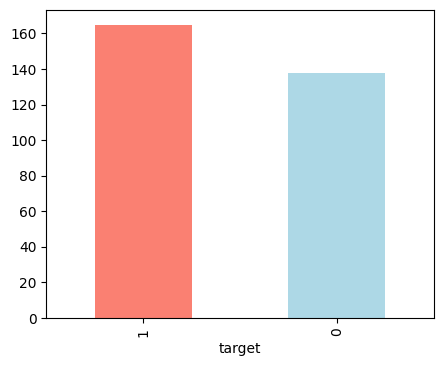

In [8]:
heart_disease["target"].value_counts().plot( kind = "bar", color=["salmon", "lightblue"] , figsize=(5,4));

In [9]:
heart_disease.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Heart Disease frequency according to sex 

In [10]:
# Comparing target and sex column 
pd.crosstab(heart_disease["target"], heart_disease["sex"])
# sex - (1 = male; 0 = female)

sex,0,1
target,,
0,24,114
1,72,93


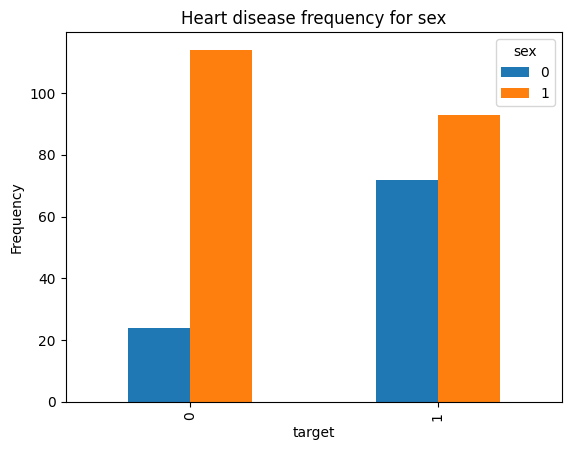

In [11]:
# Plotting the comparison
pd.crosstab(heart_disease["target"], heart_disease["sex"]).plot(kind="bar")
plt.title("Heart disease frequency for sex")
plt.ylabel("Frequency");

### Age vs Max Heart rate for Heart Disease

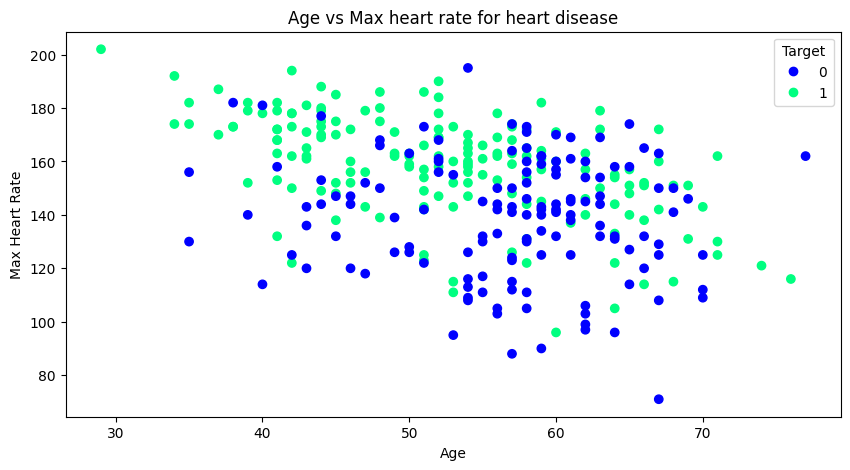

In [12]:
# Using OOPS method we are plotting the graph 
fig, ax = plt.subplots(figsize=(10,5))

com = ax.scatter(x = heart_disease["age"], y = heart_disease["thalach"], c = heart_disease["target"], cmap="winter")
ax.set(xlabel = "Age", ylabel = "Max Heart Rate", title = "Age vs Max heart rate for heart disease")
ax.legend(*com.legend_elements(), title = "Target");
# 0 - No Disease 1 - Disease

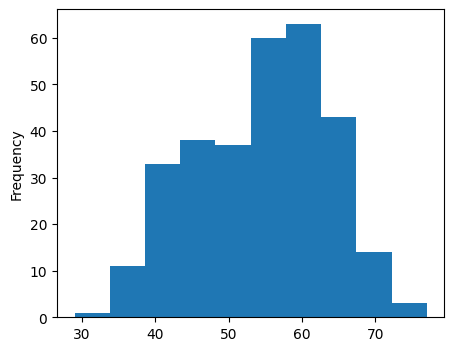

In [13]:
# Checking the plot of age using a histogram
heart_disease["age"].plot.hist(figsize=(5,4));

### Heart Disease Frequency per Chest Pain Type
* cp - chest pain type
    * 0: Typical angina: chest pain related decrease blood supply to the heart
    * 1: Atypical angina: chest pain not related to heart
    * 2: Non-anginal pain: typically esophageal spasms (non heart related)
    * 3: Asymptomatic: chest pain not showing signs of disease

In [14]:
pd.crosstab(heart_disease["cp"], heart_disease["target"])

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


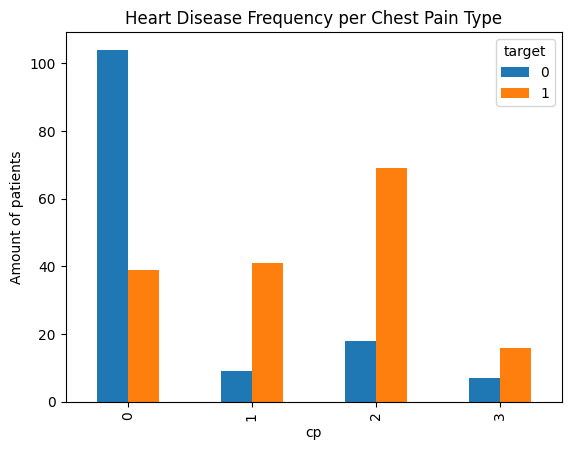

In [15]:
# Making the crosstab more visual
pd.crosstab(heart_disease["cp"], heart_disease["target"]).plot.bar()
plt.ylabel("Amount of patients")
plt.title("Heart Disease Frequency per Chest Pain Type");

In [16]:
heart_disease.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


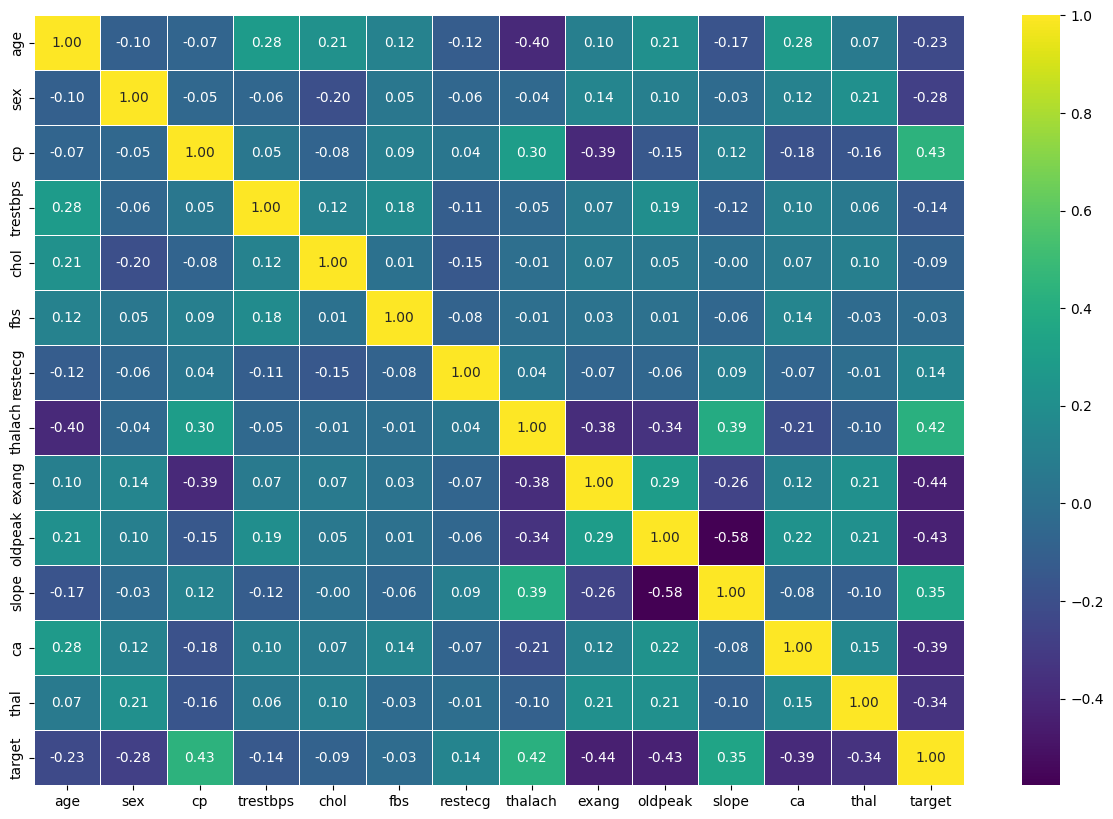

In [17]:
corr_matrix = heart_disease.corr()
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr_matrix, 
                 annot = True,
                 linewidth = 0.5,
                 fmt = ".2f",
                 cmap = "viridis")

## Modelling

In [18]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [19]:
# We are going to split the data now
x = heart_disease.drop("target", axis = 1)
y = heart_disease["target"]

In [20]:
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [21]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [22]:
# Split data into train and test sets
np.random.seed(42)

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [23]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
132,42,1,1,120,295,0,1,162,0,0.0,2,0,2
202,58,1,0,150,270,0,0,111,1,0.8,2,0,3
196,46,1,2,150,231,0,1,147,0,3.6,1,0,2
75,55,0,1,135,250,0,0,161,0,1.4,1,0,2
176,60,1,0,117,230,1,1,160,1,1.4,2,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,50,1,2,140,233,0,1,163,0,0.6,1,1,3
71,51,1,2,94,227,0,1,154,1,0.0,2,1,3
106,69,1,3,160,234,1,0,131,0,0.1,1,1,2
270,46,1,0,120,249,0,0,144,0,0.8,2,0,3


In [24]:
y_train

132    1
202    0
196    0
75     1
176    0
      ..
188    0
71     1
106    1
270    0
102    1
Name: target, Length: 242, dtype: int64

### Now we have our train and test splits.

We are going to train(find patterns) our model on training set.

And test(use the patterns) on the test set.

We are going to 3 different machine learning models: 
* 1. Logistic Regression
* 2. Random Forest Classifier
* 3. K-Nearest Neighbors Classifier 
    


In [77]:
models = {"LogisticRegression" : LogisticRegression(),
          "KNN" : KNeighborsClassifier(),
          "Random Forest" : RandomForestClassifier()}

# Function to fit data for each classifier and return score
def fit_and_score(models, X_train, y_train, X_test, y_test):
    np.random.seed(42)

    # To store model scores
    model_scores = {}
    for name, model in models.items():
        # Fit the data using respective classifier
        model.fit(X_train, y_train)

        # Store the score in dictionary
        model_scores[name] = model.score(X_test, y_test)
    return model_scores        

In [78]:
model_scores = fit_and_score(models = models, 
                             X_train = X_train, 
                             y_train = y_train, 
                             X_test = X_test, 
                             y_test = y_test)
model_scores

c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'LogisticRegression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

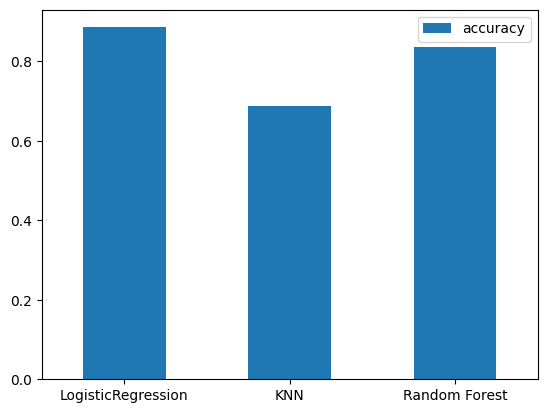

In [27]:
model_compare = pd.DataFrame(model_scores, index = ["accuracy"])
model_compare.T.plot.bar()
plt.xticks(rotation = 0);

Now we have a baseline model but model's first predictions aren't always the conclusion so the following steps are done to try and check if we can squeeze out more accuracy.

* Hypyterparameter tuning
* Feature importance
* Confusion matrix
* Cross-validation
* Precision
* Recall
* F1 score
* Classification report
* ROC curve
* Area under the curve (AUC)

### Hyperparameter tuning (by hand)

In [28]:
# We are tuning KNeighborsClassifier 

train_scores = []
test_scores = []

neighbours  = range(1,21)

knn = KNeighborsClassifier()

# Loop through different neighbours
for i in neighbours:
    knn.set_params( n_neighbors = i )
    knn.fit(X_train, y_train)
    train_scores.append(knn.score(X_train, y_train))
    test_scores.append(knn.score(X_test, y_test))


In [29]:
train_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [30]:
test_scores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

Maximum KNN score on the test data: 75.41%


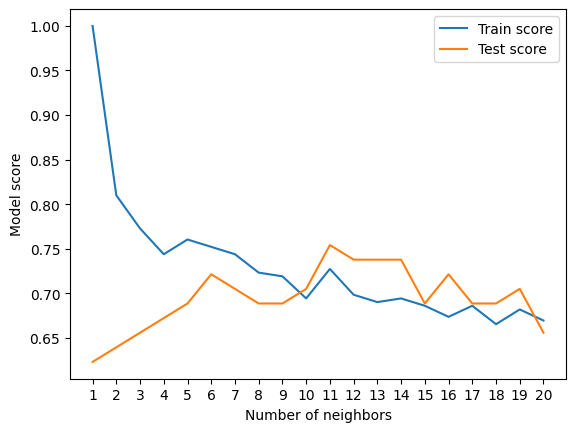

In [31]:
plt.plot(neighbours, train_scores, label="Train score")
plt.plot(neighbours, test_scores, label="Test score")
plt.xticks(np.arange(1, 21, 1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()

print(f"Maximum KNN score on the test data: {max(test_scores)*100:.2f}%")

## Hyperparameter Tuning by RandomizedSearchCV

In [32]:
# We are going to tune LogisticRegression and Random Forest

# Hyperparameters for logistic regression
log_randcv = {"C" : np.logspace(-4,4,20),
              "solver" : ["liblinear"]}

# Hyperparameters for random forest
fore_randcv = {"n_estimators" : np.arange(10,1000,50),
               "max_depth" : [None, 3, 5, 10],
               "min_samples_split" : np.arange(2,20,2),
               "min_samples_leaf" : np.arange(1, 20, 2)}


In [33]:
# Now we have hyperparameters for each lets tune them using RandomizedSearchCV

# Tuning Logistic Regression

np.random.seed(42)

rs_log = RandomizedSearchCV(LogisticRegression(),
                            param_distributions=log_randcv,
                            cv = 5,
                            n_iter = 20,
                            verbose = True)
rs_log.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [34]:
rs_log.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [35]:
rs_log.score(X_test, y_test)

0.8852459016393442

Now lets do the same for Random Forest

In [36]:
np.random.seed(42)

rs_ranf = RandomizedSearchCV(estimator = RandomForestClassifier(),
                             param_distributions = fore_randcv,
                             cv = 5,
                             n_iter = 20,
                             verbose = True)

# Fitting hyperparameters
rs_ranf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [37]:
rs_ranf.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [38]:
rs_ranf.score(X_test, y_test)

0.8688524590163934

Since Logistic Regression does best so far we are going to try and improve it GridSearchCV

In [39]:
log_grid = {"C" : np.logspace(-4, 4, 30),
            "tol" : np.logspace(-10,10,30),
            "max_iter" : [1000, 2000],
            "solver" : ["liblinear"]}

gs_log_reg = GridSearchCV(estimator=LogisticRegression(),
                          param_grid=log_grid,
                          cv = 5,
                          verbose = True)
gs_log_reg.fit(X_train, y_train)


Fitting 5 folds for each of 1800 candidates, totalling 9000 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.236708...
       5.73615251e-08, 2.80721620e-07, 1.37382380e-06, 6.72335754e-06,
       3.29034456e-05, 1.61026203e-04, 7.88046282e-04, 3.85662042e-03,
       1.88739182e-02, 9.23670857e-02, 4.52035366e-01, 2.21221629e+00,
       1.08263673e+01, 5.29831691e+01, 2.59294380e+02, 1.26896100e+03,
       6.21016942e+03, 3.03919538e+04, 1.48735211e+05, 7.27895384e+05,
       3.56224789e+06, 1.74332882e+07, 8.53167852e+07, 4.17531894e+08,
       2.04335972e+09, 1.00000000e+10])},
             verbose=True)

In [40]:
gs_log_reg.best_params_

{'C': 0.38566204211634725,
 'max_iter': 1000,
 'solver': 'liblinear',
 'tol': 0.018873918221350997}

In [41]:
gs_log_reg.score(X_test, y_test)

0.8852459016393442

After trying out and tuning some hyperparameters we have the same result as before

Thus we are going to try some boosting algorithms to decide our next steps

XG Boost

In [42]:
# A classifier to fit the data
xgb_m = xg.XGBClassifier(booster='gblinear')

xgb_m.fit(X_train, y_train)

XGBClassifier(base_score=None, booster='gblinear', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [43]:
xgb_m.score(X_test, y_test)

0.8524590163934426

Cat Boost

In [44]:
cat_m = CatBoostClassifier()

cat_m.fit(X_train, y_train)

Learning rate set to 0.005621
0:	learn: 0.6884219	total: 143ms	remaining: 2m 22s
1:	learn: 0.6846994	total: 144ms	remaining: 1m 12s
2:	learn: 0.6804470	total: 146ms	remaining: 48.5s
3:	learn: 0.6762242	total: 148ms	remaining: 36.8s
4:	learn: 0.6716784	total: 149ms	remaining: 29.7s
5:	learn: 0.6672808	total: 151ms	remaining: 25s
6:	learn: 0.6639958	total: 152ms	remaining: 21.6s
7:	learn: 0.6601980	total: 154ms	remaining: 19.1s
8:	learn: 0.6563766	total: 155ms	remaining: 17.1s
9:	learn: 0.6525103	total: 157ms	remaining: 15.5s
10:	learn: 0.6483670	total: 158ms	remaining: 14.2s
11:	learn: 0.6448827	total: 161ms	remaining: 13.2s
12:	learn: 0.6412767	total: 162ms	remaining: 12.3s
13:	learn: 0.6374286	total: 163ms	remaining: 11.5s
14:	learn: 0.6335427	total: 164ms	remaining: 10.8s
15:	learn: 0.6288052	total: 166ms	remaining: 10.2s
16:	learn: 0.6250489	total: 167ms	remaining: 9.67s
17:	learn: 0.6209495	total: 169ms	remaining: 9.2s
18:	learn: 0.6181899	total: 170ms	remaining: 8.77s
19:	learn: 0

In [45]:
cat_m.score(X_test, y_test)

0.8360655737704918

Now we are going to tune our boosting algorithms by trying out various hyperparamaters using GridSearchCV

In [46]:
# Tuning XG Boost  
params = {
    'booster': ['gbtree'],
    'max_depth': [3,5,8],
    'min_child_weight': [3,5,7],
    'gamma': [0.05,0.1],
    'learning_rate': [0.05,0.09],
    'subsample': [0.8],
    'colsample_bytree': [0.3],
    'objective': ['binary:logistic'],
    'eval_metric': ['auc'],
    'lambda': [1],
    'alpha': [0.5],
    'n_estimators': [100,200,400],
}

# Setting out GridSearchCV
xgb_g = GridSearchCV(estimator=xgb_m,
                     param_grid=params,
                     cv = 5,
                     verbose = True)

xgb_g.fit(X_train, y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster='gblinear',
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate...
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'alpha': [0.5], 'booster': ['gbtree'],
                         'colsample_bytree': [0.3], 'eval_metric': ['auc'],
                         'gamma': [0.05, 0.1], 'lambda': [1],
                         'learning_rate': [0.05, 0.09], 'max_depth': [3, 5, 8],
                         'min_child_weight': [3, 5, 7],
                         'n_estimators': [100, 200, 400],
                         'objective': ['binary:logistic'], 'subsample': [0.8]},
             verbose=True)

In [47]:
xgb_g.best_params_

{'alpha': 0.5,
 'booster': 'gbtree',
 'colsample_bytree': 0.3,
 'eval_metric': 'auc',
 'gamma': 0.05,
 'lambda': 1,
 'learning_rate': 0.05,
 'max_depth': 3,
 'min_child_weight': 5,
 'n_estimators': 400,
 'objective': 'binary:logistic',
 'subsample': 0.8}

In [48]:
xgb_g.score(X_test, y_test)

0.8852459016393442

Since we have obtained the same results as Logistic Regression we are going to try to tune it more

In [49]:

params_1 = {
    'booster': 'gblinear',
    'lambda': 1.0,
    'alpha': 0.5,
    'updater': 'shotgun',
    'learning_rate': 0.1,
    'n_estimators': 200,
    'feature_selector': 'cyclic'
}

xgb_g_2 = GridSearchCV(estimator=xgb_m,
                     param_grid=params,
                     cv = 5,
                     verbose = True)

xgb_g_2.fit(X_train, y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster='gblinear',
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate...
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'alpha': [0.5], 'booster': ['gbtree'],
                         'colsample_bytree': [0.3], 'eval_metric': ['auc'],
                         'gamma': [0.05, 0.1], 'lambda': [1],
                         'learning_rate': [0.05, 0.09], 'max_depth': [3, 5, 8],
                         'min_child_weight': [3, 5, 7],
                         'n_estimators': [100, 200, 400],
                         'objective': ['binary:logistic'], 'subsample': [0.8]},
             verbose=True)

In [50]:
xgb_g_2.best_params_

{'alpha': 0.5,
 'booster': 'gbtree',
 'colsample_bytree': 0.3,
 'eval_metric': 'auc',
 'gamma': 0.05,
 'lambda': 1,
 'learning_rate': 0.05,
 'max_depth': 3,
 'min_child_weight': 5,
 'n_estimators': 400,
 'objective': 'binary:logistic',
 'subsample': 0.8}

In [51]:
xgb_g_2.score(X_test, y_test)

0.8852459016393442

In [52]:
# Tuning our Cat Boost Algorithm
params_cat = {
    'iterations': [200],
    'learning_rate': [0.05],
    'depth': [4],
    'l2_leaf_reg': [5],
    'random_strength': [2],
    'bagging_temperature': [0.8],
    'border_count': [64],
    'subsample': [0.7],
    'loss_function': ['Logloss'],
    'eval_metric': ['AUC'],
    'early_stopping_rounds': [20],
    'od_type': ['IncToDec']
}

cat_g_2 = GridSearchCV(estimator=CatBoostClassifier(),
                       param_grid=params_cat,
                       cv = 10,
                       verbose = 1)

cat_g_2.fit(X_train, y_train)

Fitting 10 folds for each of 1 candidates, totalling 10 fits
0:	total: 1.23ms	remaining: 245ms
1:	total: 2.54ms	remaining: 251ms
2:	total: 3.67ms	remaining: 241ms
3:	total: 5ms	remaining: 245ms
4:	total: 6.29ms	remaining: 245ms
5:	total: 7.3ms	remaining: 236ms
6:	total: 8.22ms	remaining: 227ms
7:	total: 9.06ms	remaining: 217ms
8:	total: 9.99ms	remaining: 212ms
9:	total: 10.9ms	remaining: 207ms
10:	total: 11.8ms	remaining: 203ms
11:	total: 12.6ms	remaining: 198ms
12:	total: 13.5ms	remaining: 195ms
13:	total: 14.4ms	remaining: 191ms
14:	total: 15.4ms	remaining: 190ms
15:	total: 16.3ms	remaining: 188ms
16:	total: 17.5ms	remaining: 188ms
17:	total: 18.5ms	remaining: 187ms
18:	total: 19.5ms	remaining: 185ms
19:	total: 20.2ms	remaining: 182ms
20:	total: 20.9ms	remaining: 178ms
21:	total: 21.8ms	remaining: 177ms
22:	total: 22.6ms	remaining: 174ms
23:	total: 23.8ms	remaining: 174ms
24:	total: 24.9ms	remaining: 174ms
25:	total: 25.7ms	remaining: 172ms
26:	total: 26.4ms	remaining: 169ms
27:	tota

GridSearchCV(cv=10,
             estimator=<catboost.core.CatBoostClassifier object at 0x0000020FC3DDA7E0>,
             param_grid={'bagging_temperature': [0.8], 'border_count': [64],
                         'depth': [4], 'early_stopping_rounds': [20],
                         'eval_metric': ['AUC'], 'iterations': [200],
                         'l2_leaf_reg': [5], 'learning_rate': [0.05],
                         'loss_function': ['Logloss'], 'od_type': ['IncToDec'],
                         'random_strength': [2], 'subsample': [0.7]},
             verbose=1)

In [53]:
cat_g_2.best_params_

{'bagging_temperature': 0.8,
 'border_count': 64,
 'depth': 4,
 'early_stopping_rounds': 20,
 'eval_metric': 'AUC',
 'iterations': 200,
 'l2_leaf_reg': 5,
 'learning_rate': 0.05,
 'loss_function': 'Logloss',
 'od_type': 'IncToDec',
 'random_strength': 2,
 'subsample': 0.7}

In [54]:
cat_g_2.score(X_test, y_test)

0.8524590163934426

## Evaluting our tuned machine learning classifier, beyond accuracy

* ROC curve and AUC score
* Confusion matrix
* Classification report
* Precision
* Recall
* F1-score

To make comparisons and evaluate our trained model, first we need to make predictions.

In [55]:
# Make predictions with tuned model
y_predict = gs_log_reg.predict(X_test)
y_predict

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [56]:
y_test

179    0
228    0
111    1
246    0
60     1
      ..
249    0
104    1
300    0
193    0
184    0
Name: target, Length: 61, dtype: int64

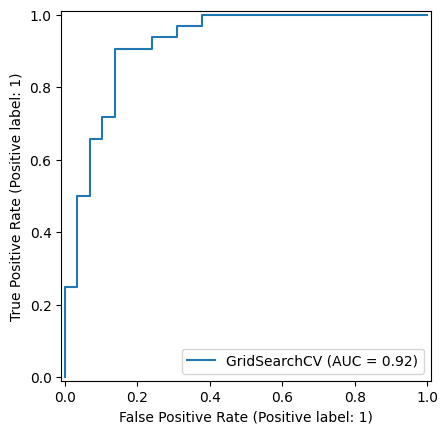

In [57]:
# Plotting ROC Curve and calculating AUC score
RocCurveDisplay.from_estimator(gs_log_reg, X_test, y_test);

In [58]:
confusion_matrix(y_test, y_predict)

array([[25,  4],
       [ 3, 29]], dtype=int64)

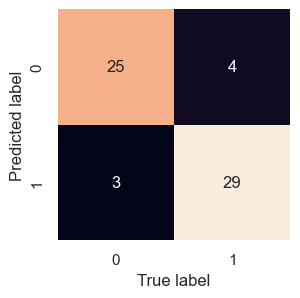

In [59]:
sns.set(font_scale=1)
"""
Plots a nice looking confusion matrix using Seaborn's heatmap()
"""
fig, ax = plt.subplots(figsize=(3, 3))
ax = sns.heatmap(confusion_matrix(y_test, y_predict),
                    annot=True,
                    cbar=False)
plt.xlabel("True label")
plt.ylabel("Predicted label");

In [60]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



Now we will be using cross validation score to accuracy, precision, recall and f1 score

In [61]:
gs_log_reg.best_params_

{'C': 0.38566204211634725,
 'max_iter': 1000,
 'solver': 'liblinear',
 'tol': 0.018873918221350997}

In [62]:
# Create a new classifier with best parameters
clf = LogisticRegression(C=0.20433597178569418,
                         solver="liblinear")

In [63]:
# Cross-validated accuracy
cv_acc = cross_val_score(clf,
                         x,
                         y,
                         cv=5,
                         scoring="accuracy")
cv_acc

array([0.81967213, 0.90163934, 0.8852459 , 0.88333333, 0.75      ])

In [64]:
cv_acc = np.mean(cv_acc)
cv_acc

0.8479781420765027

In [65]:
# Cross-validated precision
cv_precision = cross_val_score(clf,
                         x,
                         y,
                         cv=5,
                         scoring="precision")
cv_precision=np.mean(cv_precision)
cv_precision

0.8215873015873015

In [66]:
# Cross-validated recall
cv_recall = cross_val_score(clf,
                         x,
                         y,
                         cv=5,
                         scoring="recall")
cv_recall = np.mean(cv_recall)
cv_recall

0.9272727272727274

In [67]:
# Cross-validated f1-score
cv_f1 = cross_val_score(clf,
                         x,
                         y,
                         cv=5,
                         scoring="f1")
cv_f1 = np.mean(cv_f1)
cv_f1

0.8705403543192143

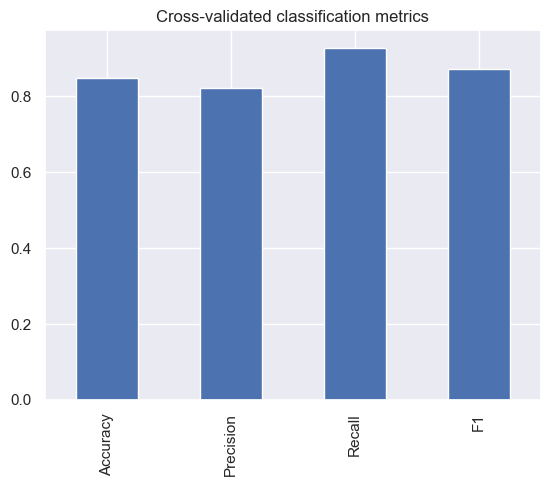

In [68]:
# Visualize cross-validated metrics
cv_metrics = pd.DataFrame({"Accuracy": cv_acc,
                           "Precision": cv_precision,
                           "Recall": cv_recall,
                           "F1": cv_f1},
                          index=[0])

cv_metrics.T.plot.bar(title="Cross-validated classification metrics",
                      legend=False);

### Feature Importance

Feature importance means asking, "which features contributed most to the outcomes of the model and how did they contribute?"

Let's find the feature importance for our LogisticRegression model...

In [69]:
# Fit an instance of LogisticRegression
clf = LogisticRegression(C=0.20433597178569418,
                         solver="liblinear")

clf.fit(X_train, y_train);

In [70]:
# Check coef_
clf.coef_

array([[ 0.00320769, -0.86062047,  0.66001431, -0.01155971, -0.00166496,
         0.04017239,  0.31603402,  0.02458922, -0.6047017 , -0.56795457,
         0.45085391, -0.63733326, -0.6755509 ]])

In [71]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [72]:
# Match coef's of features to columns
feature_dict = dict(zip(heart_disease.columns, list(clf.coef_[0])))
feature_dict

{'age': 0.0032076873709286024,
 'sex': -0.8606204735539111,
 'cp': 0.6600143086174385,
 'trestbps': -0.01155970641957489,
 'chol': -0.0016649609500147373,
 'fbs': 0.04017238940156104,
 'restecg': 0.3160340177157746,
 'thalach': 0.02458922261936637,
 'exang': -0.6047017032281077,
 'oldpeak': -0.567954572983317,
 'slope': 0.4508539117301764,
 'ca': -0.6373332602422034,
 'thal': -0.6755508982355707}

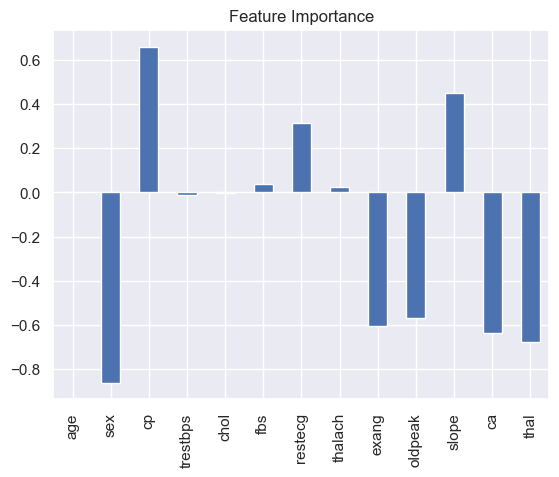

In [73]:
# Visualize feature importance
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title="Feature Importance", legend=False);

In [74]:
pd.crosstab(heart_disease["sex"], heart_disease["target"])

target,0,1
sex,,
0,24,72
1,114,93


In [75]:
pd.crosstab(heart_disease["slope"], heart_disease["target"])

target,0,1
slope,,
0,12,9
1,91,49
2,35,107


slope - the slope of the peak exercise ST segment
* 0: Upsloping: better heart rate with excercise (uncommon)
* 1: Flatsloping: minimal change (typical healthy heart)
* 2: Downslopins: signs of unhealthy heart

## 6. Experimentation
We still haven't hit our evaluation metric

Questions we can still try to look for

* Could we collect more data?
* Could we improve the current models? (beyond what we've done so far)